# Task Part 2

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#importing new dataframe
ords_prods_fin = pd.read_pickle(r'/Users/jonahsnewmacbook/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_fin.pkl')

### Creating Visualizations

#### 1. Bar Chart

<Axes: xlabel='orders_day_of_week'>

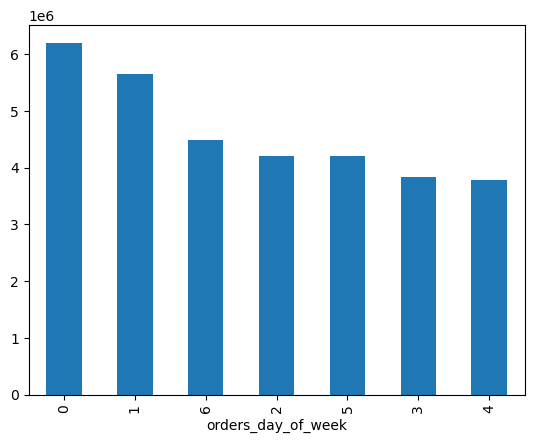

In [4]:
ords_prods_fin['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

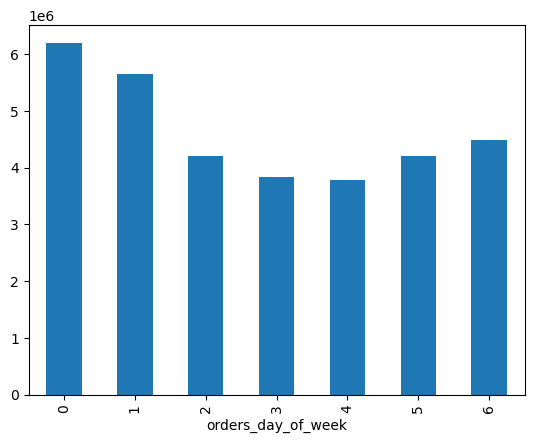

In [5]:
#putting the orders_day_of_week in numerical order
ords_prods_fin['orders_day_of_week'].value_counts().sort_index().plot.bar()

#### 2. Histogram

<Axes: ylabel='Frequency'>

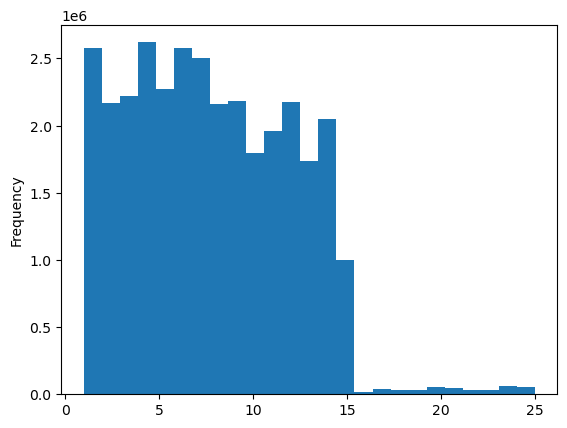

In [8]:
#creating a histogram of the 'prices' column
ords_prods_fin['prices'].plot.hist(bins=25)

#### 3. Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

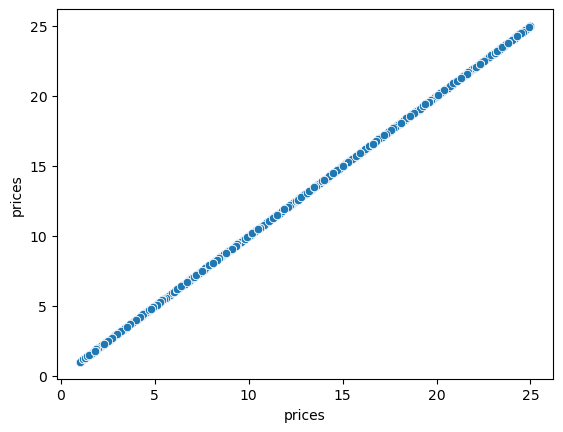

In [9]:
sns.scatterplot(x='prices', y='prices', data=ords_prods_fin)

#### 4. Line Chart

In [10]:
# Here we have to create a sample subset for this
np.random.seed(4)
dev = np.random.rand(len(ords_prods_fin)) <= 0.7

In [11]:
#checking if the list is holding True/False values
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# store 70% of data as 'big'
big = ords_prods_fin[dev]

In [13]:
# store 30% of the data as 'small'
small = ords_prods_fin[~dev]

In [14]:
#checking if the big and small completes the whole dataframe
len(ords_prods_fin)

32404859

In [15]:
len(big)+len(small)

32404859

In [16]:
#reduce the sample to only the columns needed
df = small[['orders_day_of_week', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


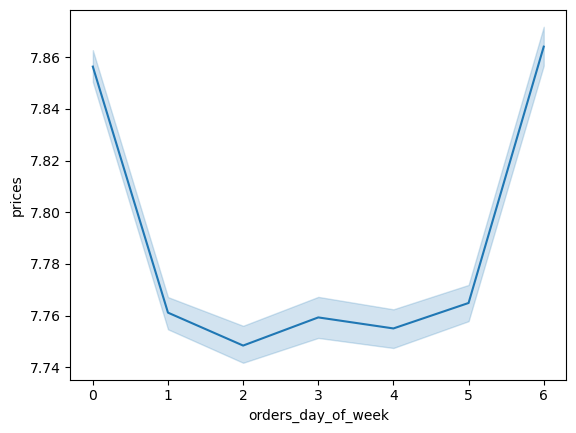

In [17]:
# lets create the line chart
line = sns.lineplot(data = df, x='orders_day_of_week', y='prices')

### Creating a histogram of the 'order_timestamp'

In [19]:
ords_prods_fin.dtypes

product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_timestamp              int64
days_since_prior_order     float64
add_to_cart_order            int64
reordered                    int64
_merge                    category
exists                    category
price_range_loc             object
busiest_day                 object
busiests_days               object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
total_spent                float64
spender_habit              float64
spender_habit2              object
frequency_median           float64
frequency_buyer             object
first_name                  object
surname                     object
gender              

<Axes: xlabel='order_timestamp'>

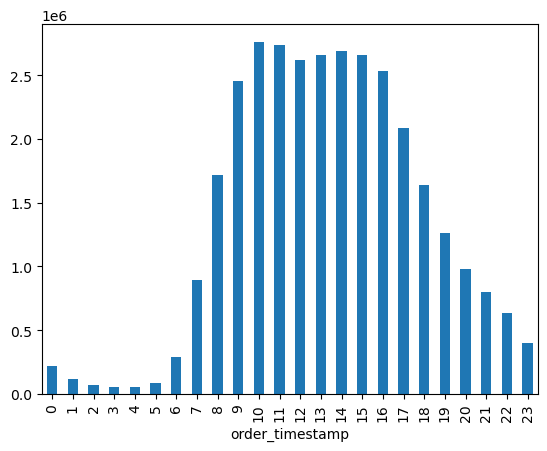

In [20]:
ords_prods_fin['order_timestamp'].value_counts().sort_index().plot.bar()

#### This histogram demonstates which hour got the most orders

### Creating a bar chart from the "loyalty_flag" column

<Axes: xlabel='loyalty_flag'>

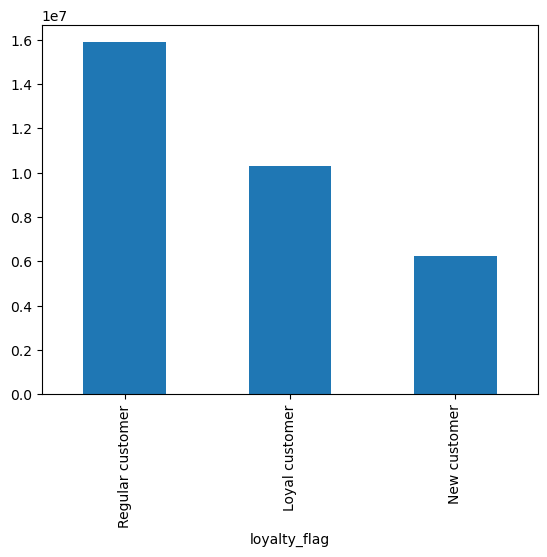

In [22]:
ords_prods_fin['loyalty_flag'].value_counts().plot.bar()

### Checking if there's a difference in expenditure depending on the hour of the day (using sample 'small')

In [24]:
# first, create a dataframe that has only the data needed
df2 = small[['order_timestamp', 'prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


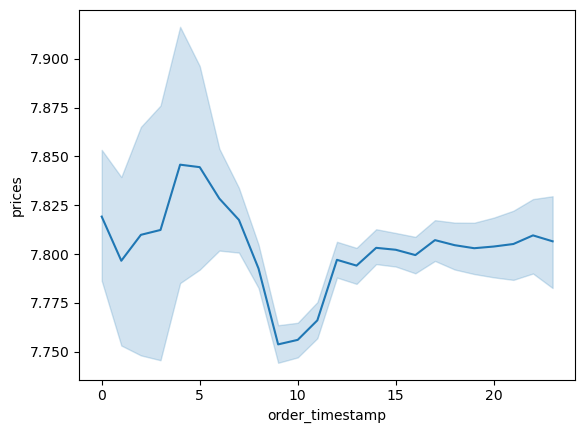

In [25]:
# create the line chart 
line2 = sns.lineplot(data = df2, x='order_timestamp', y='prices')

## Analysis of the customer demographics

### 1. Determine if there's a connection between age and family situation (line chart)

In [26]:
# create dataframe with the only needed columns
df3 = small[['age', 'n_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


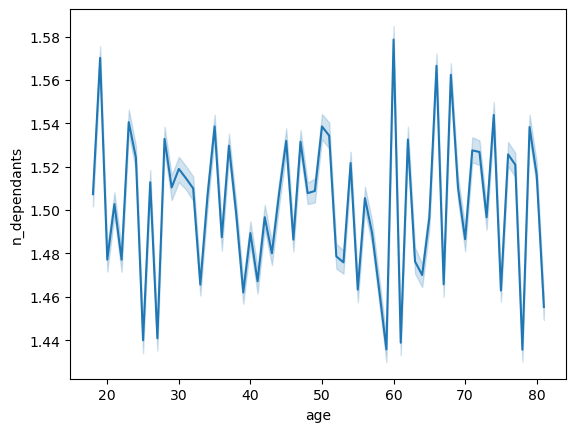

In [27]:
# create the line chart 
line3 = sns.lineplot(data = df3, x='age', y='n_dependants')

#### *Here we see that on that the range of having dependants are about between 1.44 and and 1.56

### 2. Now let's see the spending power per age (scatterplot chart)

<Axes: xlabel='age', ylabel='income'>

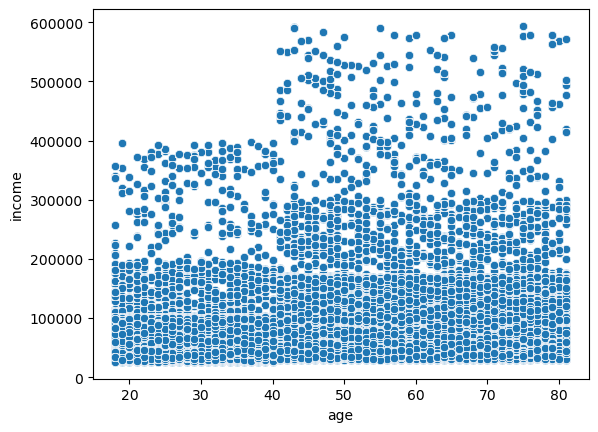

In [28]:
sns.scatterplot(x='age', y='income', data=ords_prods_fin)

#### *Although the scatterplot looks crowded, there's an obvious difference of income of some users starting around the age of 40. There are some that have much more spending power compared to those below 40s. It's important to mention that the points that are crowded in 200,000 all throughout the ages show that a lot of users are within that income range